# Given a dataset containing historical weather information of certain area, implement a linear regression model from scratch using gradient descent to predict the apparent temperature.

In [45]:
import numpy as np
import pandas as pd
from numpy.random import RandomState
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime as dt

# Data pre-processing

Data has been pre processed before traning. Categorical datas are label encoded using sklearn label encoder. Continuous data has been normalized. Formatted date is been transformed to ordinal number. 

In [76]:
df = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 2/q4/data/weather.csv')
enc = LabelEncoder()
df['Precip Type'] = enc.fit_transform(df['Precip Type'].astype('str'))
df['Summary'] = enc.fit_transform(df['Summary'].astype('str'))
df['Daily Summary'] = enc.fit_transform(df['Daily Summary'].astype('str'))
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df['Formatted Date'] = df['Formatted Date'].map(dt.datetime.toordinal)
df['Formatted Date']=(df['Formatted Date']-df['Formatted Date'].min())/(df['Formatted Date'].max()-df['Formatted Date'].min())
df['Summary']=(df['Summary']-df['Summary'].min())/(df['Summary'].max()-df['Summary'].min())
df['Temperature (C)']=(df['Temperature (C)']-df['Temperature (C)'].min())/(df['Temperature (C)'].max()-df['Temperature (C)'].min())
df['Wind Speed (km/h)']=(df['Wind Speed (km/h)']-df['Wind Speed (km/h)'].min())/(df['Wind Speed (km/h)'].max()-df['Wind Speed (km/h)'].min())
df['Wind Bearing (degrees)']=(df['Wind Bearing (degrees)']-df['Wind Bearing (degrees)'].min())/(df['Wind Bearing (degrees)'].max()-df['Wind Bearing (degrees)'].min())
df['Visibility (km)']=(df['Visibility (km)']-df['Visibility (km)'].min())/(df['Visibility (km)'].max()-df['Visibility (km)'].min())
df['Pressure (millibars)']=(df['Pressure (millibars)']-df['Pressure (millibars)'].min())/(df['Pressure (millibars)'].max()-df['Pressure (millibars)'].min())
df['Daily Summary']=(df['Daily Summary']-df['Daily Summary'].min())/(df['Daily Summary'].max()-df['Daily Summary'].min())

# Data is sliced in Traning and validation data

In [78]:
rng = RandomState()
train = df.sample(frac=0.8,random_state = rng)
validation = df.loc[~df.index.isin(train.index)]
Y_train_temp = train['Apparent Temperature (C)'].copy()
X_train = train.drop('Apparent Temperature (C)', 1)
Y_validation_temp = validation['Apparent Temperature (C)'].copy()
X_validation = validation.drop('Apparent Temperature (C)', 1)
Y_train = []
Y_validation = []
X_train = np.array(X_train).astype('float')
Y_train = np.array(Y_train_temp)
X_validation = np.array(X_validation).astype('float')
Y_validation = np.array(Y_validation_temp)

# Predict the result value

In [80]:
def prediction(X_validation, newcoeff):
    return X_validation.dot(newcoeff)

# Cost calculation

In [81]:
def cost_calculation(X_train, Y_train, Coefficient):
    leng = len(Y_train)
    sumcost = np.sum((X_train.dot(Coefficient) - Y_train) ** 2)
    cost = sumcost/(2 * leng)
    return cost

# Gradient calculation

In [82]:
def calculate_gradient(weights,X_train, Y_train):
    leng = len(Y_train)
    return X_train.T.dot(weights-Y_train) / leng

# Calculation of coefficients

In [83]:
def calculate_coefficients(coefficients, learning_rate, gradient):
    cal_grad = learning_rate * gradient
    penalty = coefficients - cal_grad
    return penalty

# Gradient descent to minimize loss function

In [84]:
def gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs):
    costs = []
    for i in range(epochs):
        weights = X_train.dot(coefficients)
        gradient = calculate_gradient(weights, X_train, Y_train)
        coefficients = calculate_coefficients(coefficients, learning_rate, gradient)
        cost = cost_calculation(X_train, Y_train, coefficients)
        costs.append(cost)
    return coefficients, costs

# Mean Sqaured Error

In [85]:
def mean_square_error(y_real,y_prediction):
    summation = 0
    n = len(y_real)
    for i in range (0,n):
        difference = y_real[i] - y_prediction[i]
        squared_difference = difference**2
        summation = summation + squared_difference
    MSE = summation/n
    return MSE

# Mean Absolute Error

In [86]:
def mean_absolute_error(y_real,y_prediction):
    summation = 0
    n = len(y_real)
    for i in range (0,n):
        difference = np.abs(y_real[i] - y_prediction[i])
        summation = summation + difference
    MAE = summation/n
    return MAE

# Mean Percentage Error

In [95]:
def mean_percentage_error(y_real,y_prediction):
    summation = 0
    n = len(y_real)
    for i in range (0,n):
        if(y_real[i] != 0):
            difference = (y_real[i] - y_prediction[i])
            fraction = np.abs(difference/y_real[i])
            summation = summation + fraction
    MPE = summation*100/n
    return MPE

# Taking coefficients all zero i.e.- [0,0,0,0,0,0] and calculation of Mean Squared Erroe, Mean Absolute Error and Mean Percentage Error

In [99]:
coefficients = np.zeros(X_train.shape[1])
learning_rate = 0.001
epochs = 100000
newcoeff, cost = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
print('Mean Squared Error ', mean_square_error(Y_validation, Y_predict))
print('Mean Absolute Error ', mean_absolute_error(Y_validation, Y_predict))
print('Mean Percentage Error ', mean_percentage_error(Y_validation, Y_predict))

Mean Squared Error  6.3351055234402
Mean Absolute Error  2.0217169618277313
Mean Percentage Error  118.69409037561758


# Plotting of cost(Y-axis) with with number of iterations(X-axis)

Text(0, 0.5, 'cst')

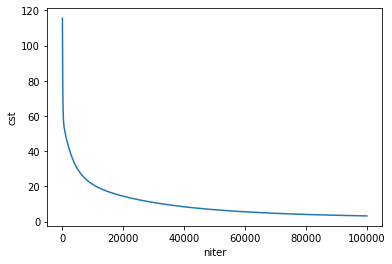

In [100]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitiing

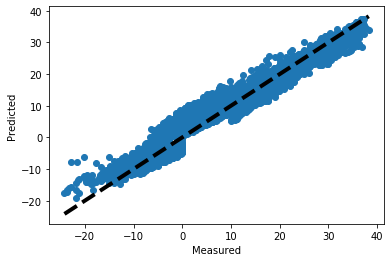

In [101]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Taking coefficients all zero i.e.- [-1,-1,-1,-1,-1,-1] and calculation of Mean Squared Erroe, Mean Absolute Error and Mean Percentage Error

In [102]:
coefficients = np.full(X_train.shape[1],-1)
learning_rate = 0.001
epochs = 100000
newcoeff, cost = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
print('Mean Squared Error ', mean_square_error(Y_validation, Y_predict))
print('Mean Absolute Error ', mean_absolute_error(Y_validation, Y_predict))
print('Mean Percentage Error ', mean_percentage_error(Y_validation, Y_predict))

Mean Squared Error  6.342444800672709
Mean Absolute Error  2.0233770619736573
Mean Percentage Error  118.55751341403666


# Plotting of cost(Y-axis) with with number of iterations(X-axis)

Text(0, 0.5, 'cst')

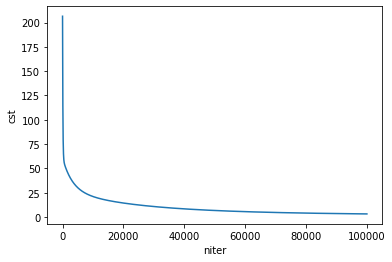

In [103]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitiing

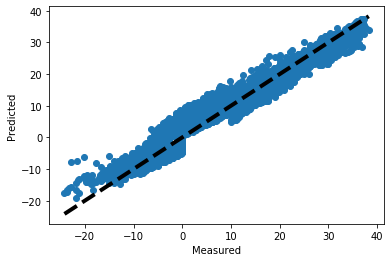

In [104]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Taking coefficients all one i.e.- [1,1,1,1,1,1] and calculation of Mean Squared Erroe, Mean Absolute Error and Mean Percentage Error

In [106]:
coefficients = np.full(X_train.shape[1],1)
learning_rate = 0.001
epochs = 100000
newcoeff, cost = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
print('Mean Squared Error ', mean_square_error(Y_validation, Y_predict))
print('Mean Absolute Error ', mean_absolute_error(Y_validation, Y_predict))
print('Mean Percentage Error ', mean_percentage_error(Y_validation, Y_predict))

Mean Squared Error  6.329505056785964
Mean Absolute Error  2.020226092572315
Mean Percentage Error  118.83305369564494


# Plotting of cost(Y-axis) with with number of iterations(X-axis)

Text(0, 0.5, 'cst')

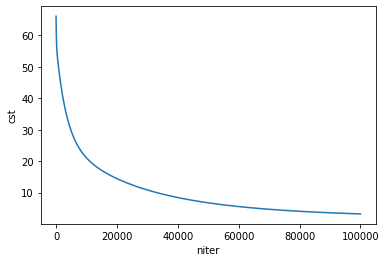

In [107]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitiing

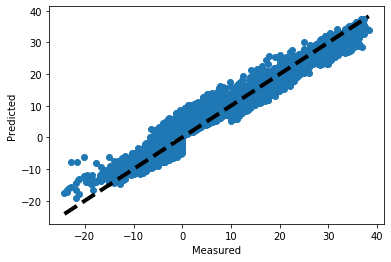

In [108]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Taking coefficients all zero i.e.- [1.4,1.4,1.4,1.4,1.4,1.4] and calculation of Mean Squared Erroe, Mean Absolute Error and Mean Percentage Error

In [105]:
coefficients = np.full(X_train.shape[1],1.4)
learning_rate = 0.001
epochs = 100000
newcoeff, cost = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
print('Mean Squared Error ', mean_square_error(Y_validation, Y_predict))
print('Mean Absolute Error ', mean_absolute_error(Y_validation, Y_predict))
print('Mean Percentage Error ', mean_percentage_error(Y_validation, Y_predict))

Mean Squared Error  6.327751737086518
Mean Absolute Error  2.019696484372491
Mean Percentage Error  118.8894721764153


# Plotting of cost(Y-axis) with with number of iterations(X-axis)

Text(0, 0.5, 'cst')

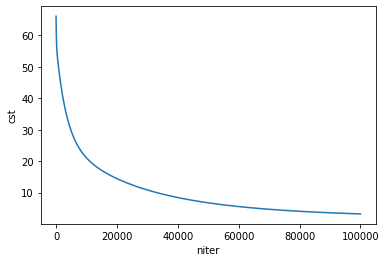

In [109]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitiing

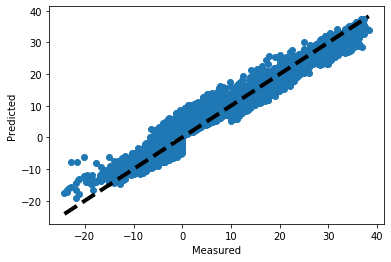

In [110]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

MSE can be used to penalize large error in some cases. But in some cases MAE is better than MSE. MSE does not tell about average error alone and has other difficult implications. MSE does not use the absolute value liek MAE, which is not accepted in many mathemetics calculation